In [1]:
import pandas as pd # type: ignore
import talib # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

def load_data(filepath):
    data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')
    return data

filepath = 'C:/Users/nejat/AIM Projects/week1 data/yfinance_data/AAPL_historical_data.csv'
data = load_data(filepath)

print("Initial data:")
print(data.head())

Initial data:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  


In [2]:
def calculate_moving_averages(data, short_period=20, long_period=50):
    data['SMA_' + str(short_period)] = talib.SMA(data['Close'], timeperiod=short_period)
    data['SMA_' + str(long_period)] = talib.SMA(data['Close'], timeperiod=long_period)
    return data

def calculate_rsi(data, period=14):
    data['RSI'] = talib.RSI(data['Close'], timeperiod=period)
    return data

def calculate_macd(data, fastperiod=12, slowperiod=26, signalperiod=9):
    macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)
    data['MACD'] = macd
    data['MACD_Signal'] = macd_signal
    data['MACD_Hist'] = macd_hist
    return data

data = calculate_moving_averages(data)
data = calculate_rsi(data)
data = calculate_macd(data)

data.dropna(inplace=True)

print("Updated data:")
print(data.head())

Updated data:
                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1981-02-24  0.107143  0.107143  0.106027  0.106027   0.081736  16979200   
1981-02-25  0.112723  0.113281  0.112723  0.112723   0.086898  19488000   
1981-02-26  0.114397  0.114955  0.114397  0.114397   0.088188  10841600   
1981-02-27  0.118304  0.119420  0.118304  0.118304   0.091200  14761600   
1981-03-02  0.118862  0.119420  0.118862  0.118862   0.091630  11760000   

            Dividends  Stock Splits    SMA_20    SMA_50        RSI      MACD  \
Date                                                                           
1981-02-24        0.0           0.0  0.121763  0.132578  33.119800 -0.007079   
1981-02-25        0.0           0.0  0.120257  0.132266  41.038378 -0.006813   
1981-02-26        0.0           0.0  0.119057  0.132120  42.859818 -0.006393   
1981-02-27        0.0           0.0  0.118304  0.132232  46.

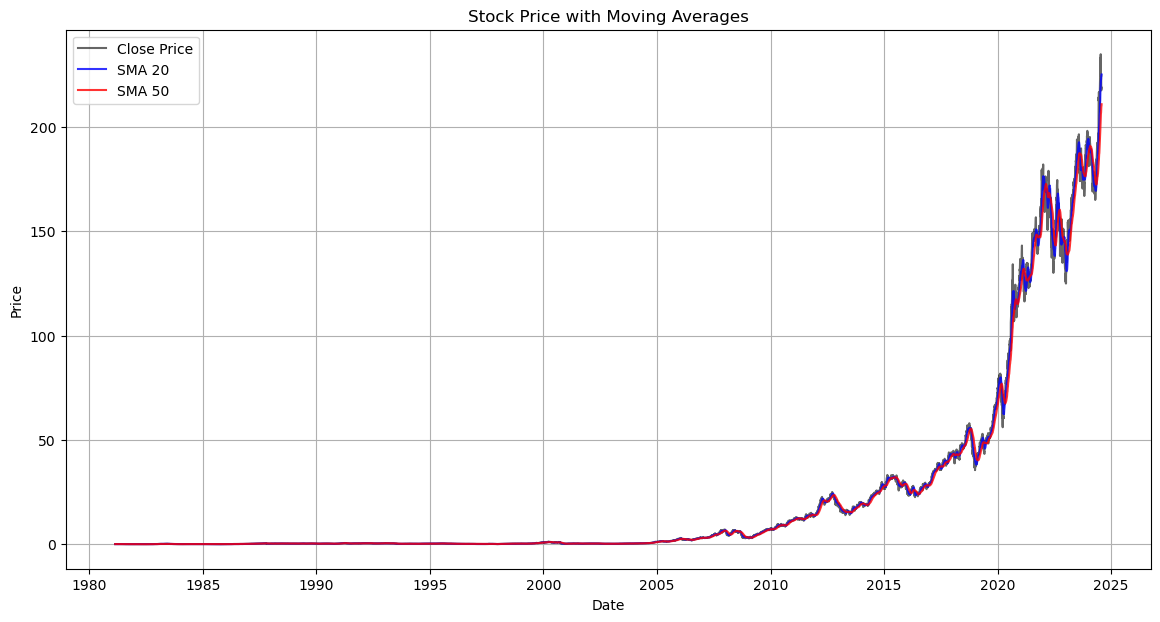

In [3]:
def plot_moving_averages(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.6)
    plt.plot(data.index, data['SMA_20'], label='SMA 20', color='blue', alpha=0.8)
    plt.plot(data.index, data['SMA_50'], label='SMA 50', color='red', alpha=0.8)
    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_moving_averages(data)


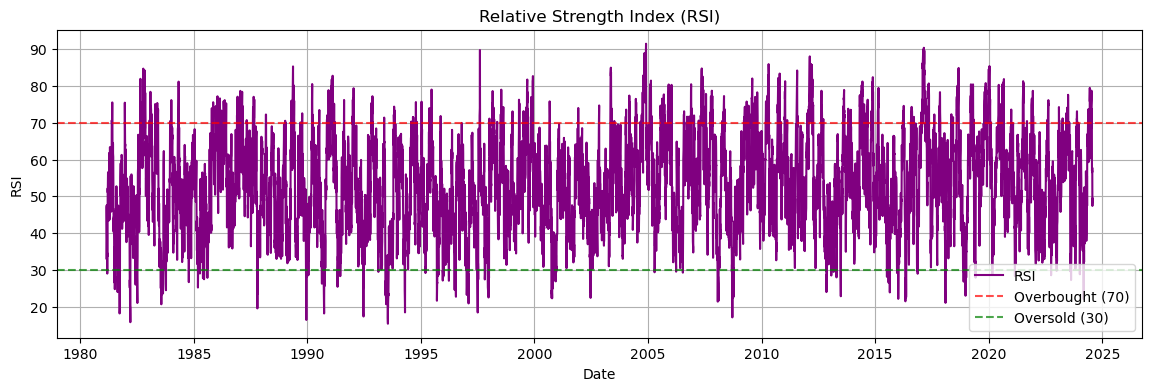

In [8]:
def plot_rsi(data):
    plt.figure(figsize=(14, 4))
    plt.plot(data.index, data['RSI'], label='RSI', color='purple')

    plt.axhline(70, linestyle='--', color='red', alpha=0.7, label='Overbought (70)')
    plt.axhline(30, linestyle='--', color='green', alpha=0.7, label='Oversold (30)')


    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_rsi(data)


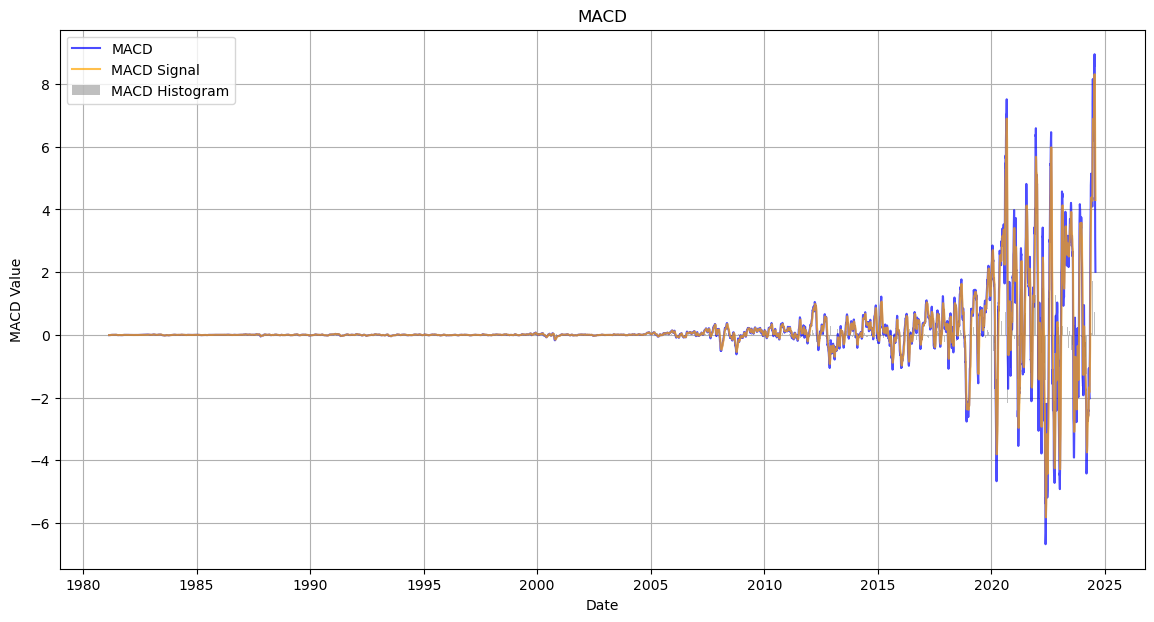

In [5]:
def plot_macd(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['MACD'], label='MACD', color='blue', alpha=0.7)
    plt.plot(data.index, data['MACD_Signal'], label='MACD Signal', color='orange', alpha=0.7)
    plt.bar(data.index, data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
    plt.title('MACD')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_macd(data)
